# IMPORTING LIBRARIES

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# LOAD DATASET

In [64]:
df=pd.read_csv("Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [65]:
df.shape

(414, 8)

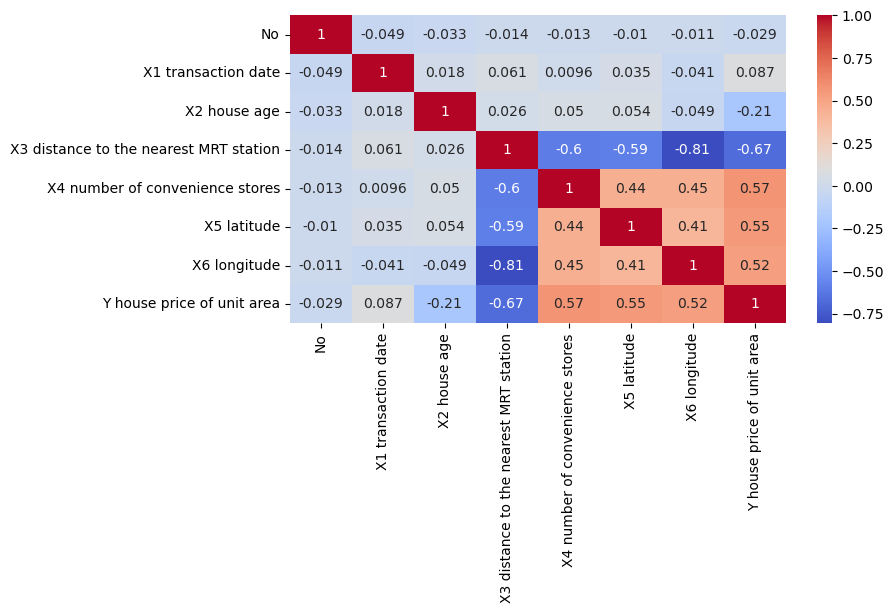

In [87]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# PREPROCESSING

In [67]:
x = df.drop(['Y house price of unit area'], axis=1)
y = df['Y house price of unit area']

In [68]:
#TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
#SCALING
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

# LINEAR REGRESSION MODEL

In [70]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [71]:
# PREDICT
y_pred_lr_test = lr.predict(x_test)
y_pred_lr_train = lr.predict(x_train)

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
print("Linear Regression(TEST):")
print("R2 Score:", r2_score(y_test, y_pred_lr_test)*100)
print("MAE:", mean_absolute_error(y_test, y_pred_lr_test))
print("MSE:", mean_squared_error(y_test, y_pred_lr_test))
print("RMSE:", root_mean_squared_error(y_test, y_pred_lr_test))

Linear Regression(TEST):
R2 Score: 67.4522867035078
MAE: 5.4180350986291295
MSE: 54.60196067337868
RMSE: 7.389313951469289


In [73]:
print("Linear Regression(TRAIN):")
print("R2 Score:", r2_score(y_train, y_pred_lr_train)*100)
print("MAE:", mean_absolute_error(y_train, y_pred_lr_train))
print("MSE:", mean_squared_error(y_train, y_pred_lr_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_lr_train))

Linear Regression(TRAIN):
R2 Score: 56.0407493551079
MAE: 6.273060901406208
MSE: 82.68317541554785
RMSE: 9.093028946151433


# KNN REGRESSION MODEL

In [74]:
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [75]:
y_pred_knn_test = knn.predict(x_test_scaled)
y_pred_knn_train = knn.predict(x_train_scaled)

In [76]:
print("KNN Regression(TEST):")
print("R2 Score:", r2_score(y_test, y_pred_knn_test)*100)
print("MAE:", mean_absolute_error(y_test, y_pred_knn_test))
print("MSE:", mean_squared_error(y_test, y_pred_knn_test))
print("RMSE:", root_mean_squared_error(y_test, y_pred_knn_test))

KNN Regression(TEST):
R2 Score: 70.46337091435255
MAE: 5.0120481927710845
MSE: 49.55057349397591
RMSE: 7.03921682390704


In [77]:
print("KNN Regression(TRAIN):")
print("R2 Score:", r2_score(y_train, y_pred_knn_train)*100)
print("MAE:", mean_absolute_error(y_train, y_pred_knn_train))
print("MSE:", mean_squared_error(y_train, y_pred_knn_train))
print("RMSE:", root_mean_squared_error(y_train, y_pred_knn_train))

KNN Regression(TRAIN):
R2 Score: 69.59115666364697
MAE: 5.050936555891239
MSE: 57.196146223564966
RMSE: 7.562813380188947


#  #####KNN MODEL SELECTED#####

# HYPERPARAMETER TUNING

# 1. GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV
p={'n_neighbors':[1,3,5,7,9,11,13,15,17], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
grid=GridSearchCV(knn, p, cv=5, scoring='r2')
grid.fit(x_train_scaled,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17],
                         'weights': ['uniform', 'distance']},
             scoring='r2')

In [79]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


#### TUNED MODEL-1

In [80]:
best_knn1 = KNeighborsRegressor(n_neighbors=15 ,weights = 'distance',algorithm = 'auto')
best_knn1.fit(x_train_scaled, y_train)
y_pred_knn_test1 = best_knn1.predict(x_test_scaled)
y_pred_knn_train1 = best_knn1.predict(x_train_scaled)

In [81]:
print("KNN Regression(TEST):")
print("R2 Score:", r2_score(y_test, y_pred_knn_test1)*100)
print("MAE:", mean_absolute_error(y_test, y_pred_knn_test1))
print("MSE:", mean_squared_error(y_test, y_pred_knn_test1))
print("RMSE:", root_mean_squared_error(y_test, y_pred_knn_test1))
print("KNN Regression(TRAIN):")
print("R2 Score:", r2_score(y_train, y_pred_knn_train1)*100)
print("MAE:", mean_absolute_error(y_train, y_pred_knn_train1))
print("MSE:", mean_squared_error(y_train, y_pred_knn_train1))
print("RMSE:", root_mean_squared_error(y_train, y_pred_knn_train1))

KNN Regression(TEST):
R2 Score: 72.03288263379142
MAE: 4.98513968029807
MSE: 46.9175646432299
RMSE: 6.8496397455070515
KNN Regression(TRAIN):
R2 Score: 100.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


# 2. RandomizedSearchCV

In [82]:
from sklearn.model_selection import RandomizedSearchCV
p={'n_neighbors':[1,3,5,7,9,11,13,15,17], 'weights':['uniform','distance'], 'algorithm':['auto','ball_tree','kd_tree','brute']}
gridd=RandomizedSearchCV(knn, p, cv=5, scoring='r2')
gridd.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [1, 3, 5, 7, 9, 11, 13,
                                                        15, 17],
                                        'weights': ['uniform', 'distance']},
                   scoring='r2')

In [83]:
print(gridd.best_params_)

{'weights': 'uniform', 'n_neighbors': 13, 'algorithm': 'brute'}


#### TUNED MODEL-2

In [84]:
best_knn2 = KNeighborsRegressor(n_neighbors=11 ,weights = 'distance',algorithm = 'kd_tree')
best_knn2.fit(x_train_scaled, y_train)
y_pred_knn_test2 = best_knn2.predict(x_test_scaled)
y_pred_knn_train2 = best_knn2.predict(x_train_scaled)

In [85]:
print("KNN Regression(TEST):")
print("R2 Score:", r2_score(y_test, y_pred_knn_test2)*100)
print("MAE:", mean_absolute_error(y_test, y_pred_knn_test2))
print("MSE:", mean_squared_error(y_test, y_pred_knn_test2))
print("RMSE:", root_mean_squared_error(y_test, y_pred_knn_test2))
print("KNN Regression(TRAIN):")
print("R2 Score:", r2_score(y_train, y_pred_knn_train2)*100)
print("MAE:", mean_absolute_error(y_train, y_pred_knn_train2))
print("MSE:", mean_squared_error(y_train, y_pred_knn_train2))
print("RMSE:", root_mean_squared_error(y_train, y_pred_knn_train2))

KNN Regression(TEST):
R2 Score: 71.1561287781409
MAE: 5.052516521150944
MSE: 48.38840467154064
RMSE: 6.956177446812339
KNN Regression(TRAIN):
R2 Score: 100.0
MAE: 0.0
MSE: 0.0
RMSE: 0.0


# #######  GRIDSEARCHCV IS BEST#############

In [86]:
print("FINAL SUMMARY")
print("---------------")
print("Best Model: KNN Regression (GridSearchCV Tuned)")
print("Best Parameters:", grid.best_params_)
print("Final R2 Score:", r2_score(y_test, y_pred_knn_test1)*100)
print("Final RMSE:", root_mean_squared_error(y_test, y_pred_knn_test1))

FINAL SUMMARY
---------------
Best Model: KNN Regression (GridSearchCV Tuned)
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}
Final R2 Score: 72.03288263379142
Final RMSE: 6.8496397455070515
